In [2]:
x = 5

In [3]:
x + 3

8

In [4]:
putStrLn "Hello!"

Hello!

In [4]:
fib :: [Integer]
fib = fibhelper 0 1 
  where fibhelper a b = a:fibhelper b (a+b)

In [5]:
take 1 fib

[0]

In [6]:
take 10 fib

[0,1,1,2,3,5,8,13,21,34]

In [7]:
take 100 fib

[0,1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597,2584,4181,6765,10946,17711,28657,46368,75025,121393,196418,317811,514229,832040,1346269,2178309,3524578,5702887,9227465,14930352,24157817,39088169,63245986,102334155,165580141,267914296,433494437,701408733,1134903170,1836311903,2971215073,4807526976,7778742049,12586269025,20365011074,32951280099,53316291173,86267571272,139583862445,225851433717,365435296162,591286729879,956722026041,1548008755920,2504730781961,4052739537881,6557470319842,10610209857723,17167680177565,27777890035288,44945570212853,72723460248141,117669030460994,190392490709135,308061521170129,498454011879264,806515533049393,1304969544928657,2111485077978050,3416454622906707,5527939700884757,8944394323791464,14472334024676221,23416728348467685,37889062373143906,61305790721611591,99194853094755497,160500643816367088,259695496911122585,420196140727489673,679891637638612258,1100087778366101931,1779979416004714189,2880067194370816120,4660046610375530309,75401138047463464

In [8]:
fib !! 1000

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

In [14]:
import Statistics.Regression.Logistic (regress, Model(..))

In [15]:
ys_ex :: [Double]
xs_ex :: [[Double]]
(ys_ex, xs_ex) = unzip $
  [ (1, [1, 1])
  , (0, [-1, -2])
  , (1, [2, 5])
  , (0, [-1, 1])
  , (1, [2, -1])
  , (1, [1, -10])
  , (0, [-0.1, 30])
  ]

Line 1: Use camelCase
Found:
ys_ex :: [Double]
Why not:
ysEx :: [Double]Line 2: Use camelCase
Found:
xs_ex :: [[Double]]
Why not:
xsEx :: [[Double]]Line 3: Redundant $
Found:
unzip
  $ [(1, [1, 1]), (0, [- 1, - 2]), (1, [2, 5]), (0, [- 1, 1]),
     (1, [2, - 1]), (1, [1, - 10]), (0, [- 0.1, 30])]
Why not:
unzip
  [(1, [1, 1]), (0, [- 1, - 2]), (1, [2, 5]), (0, [- 1, 1]),
   (1, [2, - 1]), (1, [1, - 10]), (0, [- 0.1, 30])]

In [16]:
lr = 0.1 :: Double

coef0 :: [Double]
coef0 = [1, 0.1]

In [17]:
res :: [Model [] Double]
res = regress lr ys_ex xs_ex coef0

In [19]:
take 5 res

[[0.6621903328906451,-0.2376259936399672],[0.3510174653856471,-0.548615225159959],[0.5140826519194026,-0.38545823937206614],[0.4547607470023779,-0.44473424934565764],[0.4526224749389225,-0.4468266288072586]]

In [20]:
res !! 10

[0.4531229644786555,-0.44605083282286245]

In [21]:
res !! 100

[0.45115087413886656,-0.4434468452567808]

In [22]:
res !! 1000

[0.4279910410646619,-0.4202875851390346]

In [23]:
res !! 10000

[0.2530851350828416,-0.24539275629727425]

In [29]:
res !! 100000

[5.079014367614155e-3,2.629782492165723e-3]

In [30]:
res !! 150000

[3.918333654161619e-3,3.790552171899677e-3]

In [28]:
res !! 200000

[3.904465554552823e-3,3.8044256855893567e-3]

In [27]:
res !! 500000

[3.904465554552823e-3,3.8044256855893567e-3]

In [25]:
res !! 1000000

[3.904465554552823e-3,3.8044256855893567e-3]

In [36]:
coefs = res !! 1000000

In [43]:
logisticFunction :: Double -> Double
logisticFunction x = exp x / (1 + exp x)

In [44]:
rawPredictions = map (logisticFunction . sum . zipWith (*) coefs) xs_ex
rawPredictions

[0.5019272132660024,0.49712170256324173,0.5067073625000186,0.49997499003277995,0.5010011250180373,0.49146588105289474,0.5284049639373122]

In [ ]:
catPredictions = map (>= 0.5) rawPredictions
zip ys_ex catPredictions

[(1.0,True),(0.0,False),(1.0,True),(0.0,False),(1.0,True),(1.0,False),(0.0,True)]

In [1]:
import Graphics.Rendering.Chart.Easy
-- import Graphics.Rendering.Chart.Backend.Cairo
import Graphics.Rendering.Chart.Backend.Diagrams(toFile)

signal :: [Double] -> [(Double,Double)]
signal xs = [ (x,(sin (x*3.14159/45) + 1) / 2 * (sin (x*3.14159/5))) | x <- xs ]

Line 6: Redundant bracket
Found:
(sin (x * 3.14159 / 45) + 1) / 2 * (sin (x * 3.14159 / 5))
Why not:
(sin (x * 3.14159 / 45) + 1) / 2 * sin (x * 3.14159 / 5)

In [6]:
toFile def "example1_big.png" $ do
    layout_title .= "Amplitude Modulation"
    setColors [opaque blue, opaque red]
    plot (line "am" [signal [0,(0.5)..400]])
    plot (points "am points" (signal [0,7..400]))

Line 4: Redundant bracket
Found:
(0.5)
Why not:
0.5

The following example was taken from 
[nbviewer iHaskell notebook](https://nbviewer.org/github/gibiansky/IHaskell/blob/master/notebooks/IHaskell.ipynb)

In [1]:
-- I don't think this is needed for the pie chart
import IHaskell.Display

In [1]:
import Graphics.Rendering.Chart 
import Data.Default.Class
import Control.Lens


In [2]:
let values = [
     ("Mexico City"  , 19.2, 0),
     ("Mumbai"       , 12.9, 10), 
     ("Sydney"       , 4.3,  0),
     ("London"       , 8.3,  0), 
     ("New York"     , 8.2,  25)]
     
pitem (s, v, o) = pitem_value .~ v
                $ pitem_label .~ s
                $ pitem_offset .~ o
                $ def  


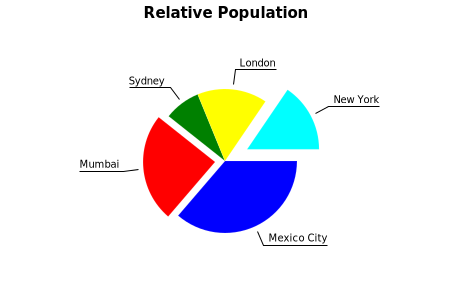

In [3]:
-- Convert to a renderable in order to display it.
toRenderable 
  $ pie_title .~ "Relative Population"
  $ pie_plot . pie_data .~ map pitem values
  $ def

In [2]:
-- We can draw diagrams, right in the notebook.
:extension NoMonomorphismRestriction FlexibleContexts TypeFamilies
import Diagrams.Prelude

-- By Brent Yorgey
-- Draw a Sierpinski triangle!
sierpinski 1 = eqTriangle 1
sierpinski n =     s
                  ===
               (s ||| s) Diagrams.Prelude.# centerX
  where s = sierpinski (n-1)

-- The `diagram` function is used to display them in the notebook.
diagram $ sierpinski 4
            # centerXY
            # fc black
          `atop` square 10
                   Diagrams.Prelude.# fc white


: 

See also https://github.com/timbod7/haskell-chart/wiki